In [ ]:
'''
При решении задач данной лабораторной работы необходимо использовать 
функции библиотеки numpy (обязательно). Также можно (и рекомендуется) 
использовать библиотеки scipy и matplotlib (либо любую другую для построения 
графиков). 
По данной работе необходимо подготовить отчет в формате блокнота Jupyter 
Notebook (.ipynb) либо в текстовом виде (.pdf).
Задача 1 (6 баллов). В файле «global-electricity-generation.csv» представлена 
информация о производстве электроэнергии странами с 1992 по 2021 год. В файле «global
electricity-consumption.csv» – информация о потреблении электроэнергии. Все данные – в 
млрд. кВт*ч. 
1. Загрузите информацию из этих файлов. 
Указание: рекомендуется воспользоваться функцией genfromtxt. Обратите внимание, 
что данные в файлах разделены запятой, в обоих файлах есть заголовок, который при 
загрузке нужно пропустить. Для корректной загрузки названий стран необходимо также 
указать тип данных (по умолчанию загружаемые данные преобразуются в вещественный 
тип). Вы можете либо собрать все данные в один массив записей, либо работать с тремя 
разными массивами: массив названий стран (одномерный, строки), массивы производства 
и потребления энергии (двумерные, вещественные)). 
Порядок стран в двух исходных файлах одинаковый. 
2. Постройте одномерные массивы ежегодного производства и потребления 
электроэнергии в среднем за последние 5 лет (один массив – производство по всем 
странам, второй – потребление по всем странам). 
Указание: не забывайте, что в агрегирующих функциях для построчной обработки 
нужно указывать параметр axis=1. 
3. Напишите выражения, позволяющие получить ответ на следующие вопросы: 
3.1. Суммарное (по всем странам) потребление электроэнергии за каждый год. 
3.2. Максимальное количество электроэнергии, которое произвела одна страна за 
один год (указание: чтобы не учитывать отсутствующие и некорректные данные 
(nan) воспользуйтесь NaN-безопасной версией функции max, то есть nanmax). 
3.3. Список стран, которые производят более 500 млрд. кВт*ч электроэнергии 
ежегодно в среднем за последние 5 лет (воспользуйтесь массивом, полученным на 
шаге 2). 
3.4. 10% стран, которые потребляют больше всего электроэнергии ежегодно в 
среднем за последние 5 лет (указание: вначале определите соответствующую 
квантиль в массиве, построенном на шаге 2). 
3.5. Список стран, которые увеличили производство электроэнергии в 2021 году по 
сравнению с 1992 годом более, чем в 10 раз. 
3.6. Список стран, которые в сумме за все годы потратили больше 100 млрд. кВт*ч 
электроэнергии и при этом произвели меньше, чем потратили. 
3.7. Какая страна потратила наибольшее количество электроэнергии в 2020 году?
'''

In [1]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. Загрузка информации из файлов «global-electricity-generation.csv» и «global-electricity-consumption.csv».

In [2]:
# Функция для проверки массива
def check_array_properties(data, name):
    print(f"Свойства массива {name}:")
    print(f"  Размерность: {data.ndim}")  # Размерность массива
    print(f"  Форма: {data.shape}")      # Форма массива
    print(f"  Тип данных: {data.dtype}")  # Тип данных
    print()

generation_data = np.genfromtxt('global-electricity-generation.csv', delimiter=',', skip_header=1, dtype=str)
consumption_data = np.genfromtxt('global-electricity-consumption.csv', delimiter=',', skip_header=1, dtype=str)
# delimiter=',' (указывает, что данные разделены запятыми).
# skip_header=1 (пропускает первую строку (заголовки столбцов)).
# dtype=None (aвтоматическое определение типов данных).

# Отключаем научную нотацию для маленьких чисел
np.set_printoptions(suppress=True) # Чтобы не отображалось так: [[1.71990000e+01 1.82670000e+01 ... 

# Заменяем пропуски значений '--' на nan, что позволит избежать ошибок при преобразовании типов в далнейшем
generation_data = np.where(generation_data == '--' , 'nan', generation_data)
generation_data = np.where(generation_data == 'ie' , 'nan', generation_data) # ie было принято считать за ошибку/пропуск и заменять  на nan
consumption_data = np.where(consumption_data == '--', 'nan', consumption_data)

In [3]:
# Проверка массива "generation_data"
check_array_properties(generation_data, "generation_data")
print("generation_data (первые з):", generation_data[:3])
print("generation_data (последний):", generation_data[-1])


Свойства массива generation_data:
  Размерность: 2
  Форма: (217, 31)
  Тип данных: <U25

generation_data (первые з): [['Algeria' '17.199' '18.267' '18.703' '18.09' '19.124' '19.739' '21.448'
  '23.282' '23.88952' '25.03064' '25.99154' '27.80964' '29.38706'
  '31.9074' '33.12352' '34.9758' '37.83582' '36.206' '42.9985' '48.17578'
  '53.9845' '56.3134' '60.39972' '64.68244' '66.75504' '71.49546'
  '72.10903' '76.685' '72.73591277' '77.53072719']
 ['Angola' '1.283' '1.332' '1.342' '1.347' '1.377' '1.331' '1.52' '1.3'
  '1.40402' '1.59074' '1.71668' '1.93776' '2.18608' '2.72998' '3.24054'
  '3.1488' '4.06368' '4.60554' '5.31724' '5.52336' '6.03408' '7.97606'
  '9.21666' '9.30914' '10.203511' '10.67604' '12.83194' '15.4' '16.6'
  '16.429392']
 ['Benin' '0.023' '0.024' '0.048' '0.029' '0.0487' '0.0517' '0.0597'
  '0.0677' '0.07908' '0.06216' '0.05934' '0.07532' '0.0762' '0.10064'
  '0.142' '0.20498' '0.21344' '0.12038' '0.10816' '0.09594' '0.04612'
  '0.08848' '0.22666' '0.31056' '0.26004' 

In [4]:
# Проверка массива "consumption_data"
check_array_properties(consumption_data, "consumption_data")
print("consumption_data (первые з):", consumption_data[:3])
print("consumption_data (последний):", consumption_data[-1])

Свойства массива consumption_data:
  Размерность: 2
  Форма: (217, 31)
  Тип данных: <U25

consumption_data (первые з): [['Algeria' '14.035' '14.039' '14.365' '14.474' '15.172' '15.365'
  '16.905' '18.492' '19.71552' '20.64764' '21.62354' '23.61164'
  '24.42506' '27.5164' '26.91052' '28.3348' '30.49982' '28.315' '33.8405'
  '38.13478' '42.8675' '45.2014' '49.20572' '53.45544' '55.82304'
  '60.28346' '62.11403' '66.646' '63.69490277' '68.66337919']
 ['Angola' '1.013' '1.062' '1.071' '1.074' '1.085' '1.216' '1.328'
  '1.106' '1.19302' '1.35274' '1.45868' '1.64976' '1.59608' '2.06798'
  '2.85054' '2.7178' '3.64768' '4.13154' '4.69024' '4.88636' '5.33508'
  '7.05006' '8.14866' '8.23114' '9.036511' '9.468667' '11.384079'
  '13.658591' '14.754764' '14.56049071']
 ['Benin' '0.229' '0.221' '0.252' '0.242' '0.2787' '0.2797' '0.2707'
  '0.3147' '0.39008' '0.39516' '0.39834' '0.48832' '0.5402' '0.58264'
  '0.606' '0.65898' '0.73544' '0.77838' '0.90716' '0.90394' '0.93312'
  '0.93648' '0.93366' '1

In [5]:
# Массив названий стран (одномерный, строки)
countries = np.array([row[0] for row in generation_data])  # Названия стран
check_array_properties(countries, "countries")
print("countries (первые з):", countries[:3])
print("countries (последний):", countries[-1])

Свойства массива countries:
  Размерность: 1
  Форма: (217,)
  Тип данных: <U25

countries (первые з): ['Algeria' 'Angola' 'Benin']
countries (последний): Venezuela


In [6]:
# Массив производства энергии (двумерные, вещественные)
generation = np.array([row[1:] for row in generation_data])  # Производство электроэнергии странами
generation = generation.astype(float)
check_array_properties(generation, "generation")
print("generation (первые з):", generation[:3])
print("generation (последний):", generation[-1])

Свойства массива generation:
  Размерность: 2
  Форма: (217, 30)
  Тип данных: float64

generation (первые з): [[17.199      18.267      18.703      18.09       19.124      19.739
  21.448      23.282      23.88952    25.03064    25.99154    27.80964
  29.38706    31.9074     33.12352    34.9758     37.83582    36.206
  42.9985     48.17578    53.9845     56.3134     60.39972    64.68244
  66.75504    71.49546    72.10903    76.685      72.73591277 77.53072719]
 [ 1.283       1.332       1.342       1.347       1.377       1.331
   1.52        1.3         1.40402     1.59074     1.71668     1.93776
   2.18608     2.72998     3.24054     3.1488      4.06368     4.60554
   5.31724     5.52336     6.03408     7.97606     9.21666     9.30914
  10.203511   10.67604    12.83194    15.4        16.6        16.429392  ]
 [ 0.023       0.024       0.048       0.029       0.0487      0.0517
   0.0597      0.0677      0.07908     0.06216     0.05934     0.07532
   0.0762      0.10064     0.142    

In [7]:
# Массив потребления энергии (двумерные, вещественные)
consumption = np.array([row[1:] for row in consumption_data])  # Производство электроэнергии странами
consumption = consumption.astype(float)
check_array_properties(consumption, "consumption")
print("consumption (первые з):", consumption[:3])
print("consumption (последний):", consumption[-1])

Свойства массива consumption:
  Размерность: 2
  Форма: (217, 30)
  Тип данных: float64

consumption (первые з): [[14.035      14.039      14.365      14.474      15.172      15.365
  16.905      18.492      19.71552    20.64764    21.62354    23.61164
  24.42506    27.5164     26.91052    28.3348     30.49982    28.315
  33.8405     38.13478    42.8675     45.2014     49.20572    53.45544
  55.82304    60.28346    62.11403    66.646      63.69490277 68.66337919]
 [ 1.013       1.062       1.071       1.074       1.085       1.216
   1.328       1.106       1.19302     1.35274     1.45868     1.64976
   1.59608     2.06798     2.85054     2.7178      3.64768     4.13154
   4.69024     4.88636     5.33508     7.05006     8.14866     8.23114
   9.036511    9.468667   11.384079   13.658591   14.754764   14.56049071]
 [ 0.229       0.221       0.252       0.242       0.2787      0.2797
   0.2707      0.3147      0.39008     0.39516     0.39834     0.48832
   0.5402      0.58264     0.606  

In [56]:
# 2. Построение одномерного массива ежегодного производства и потребления электроэнергии в среднем за последние 5 лет 
# (один массив – производство по всем странам, второй – потребление по всем странам). 

In [8]:
# Массив ежегодного производства электроэнергии в среднем за последние 5 лет
generation_last_5_years = np.nanmean(generation[:, -5:], axis=1)
check_array_properties(generation_last_5_years, "generation_last_5_years")
print("Массив ежегодного производства электроэнергии в среднем за последние 5 лет:")
print("generation_last_5_years:", generation_last_5_years)

Свойства массива generation_last_5_years:
  Размерность: 1
  Форма: (217,)
  Тип данных: float64

Массив ежегодного производства электроэнергии в среднем за последние 5 лет:
generation_last_5_years: [  74.11122599   14.3874744     0.23413146    2.61904963    1.68525657
    0.32246728    0.45439525    8.16256728    0.1510808     0.30453447
    0.1099824     3.4661865    10.79386807   10.24159544    0.05626893
  196.52500264    1.38324531    0.43289781    0.72491401   14.01181369
    2.21974979    0.30430876   17.00620656    2.26220932    0.0817928
   11.40184278    0.5165136     0.5666464    31.44370639    2.11425569
    1.71065787    3.34671057    1.73598681    2.93215213   36.9605384
   18.3195429     1.607572      0.5104544    31.49698862           nan
    0.88108324    0.0082419     0.09150928    5.0316582     0.54939056
    0.21918918    0.365736    229.31783694   16.10176262    7.59917067
    0.6507791    19.94601399    4.27968892    0.           15.609365
    8.07844052    7.3645

C:\Users\sergei\AppData\Local\Temp\ipykernel_23176\470939196.py:2: RuntimeWarning: Mean of empty slice
  generation_last_5_years = np.nanmean(generation[:, -5:], axis=1)


In [9]:
# Массив ежегодного потребления электроэнергии в среднем за последние 5 лет
consumption_last_5_years = np.nanmean(consumption[:, -5:], axis=1)
check_array_properties(consumption_last_5_years, "consumption_last_5_years")
print("Массив ежегодного потребления электроэнергии в среднем за последние 5 лет:")
print("consumption_last_5_years:", consumption_last_5_years)

Свойства массива consumption_last_5_years:
  Размерность: 1
  Форма: (217,)
  Тип данных: float64

Массив ежегодного потребления электроэнергии в среднем за последние 5 лет:
consumption_last_5_years: [  64.28035439   12.76531834    0.8581896     3.58826363    2.41878548
    0.38246534    0.32455052    6.29769097    0.1410808     0.25822447
    0.07913296    1.89292936    9.14616935    7.13665301    0.48610893
  162.09972592    1.23781144    0.38719013    1.53008067    9.3813045
    2.26861875    0.2485277    14.86277699    1.97219221    0.07699276
    8.98877963    0.87169242    0.52182197   25.73381432    1.99484721
    1.25450987    2.63071057    1.71492681    2.76459213   32.39702877
   12.94712964    4.03877769    1.24842729   26.59076039    0.
    0.76331379    0.0066843     0.0796127     4.6977852     0.51945056
    0.14058918    0.34353263  200.64908812   12.90743151    6.64550422
    1.2503993    15.98697856    2.94686172    0.           12.85550706
    8.11025916    5.74476735

In [63]:
# 3. Напишите выражения, позволяющие получить ответ на следующие вопросы:

Свойства массива total_consumption_per_year:
  Размерность: 1
  Форма: (30,)
  Тип данных: float64

Суммарное (по всем странам) потребление электроэнергии за каждый год:
total_consumption_per_year: [10569.01620096 10854.56291897 11104.65383426 11476.47904131
 11805.86547273 12122.03311393 12419.80887326 12685.75413125
 13230.24950221 13486.48970448 13938.77879299 14455.56232878
 15128.09797911 15725.98237628 16438.21377084 17205.11980814
 17477.47100677 17435.68735807 18748.16072401 19438.82349584
 19918.25495428 20573.09641373 20981.239762   21400.01776982
 22022.68687939 22716.20610151 23530.92004845 23915.65649767
 23959.68010944 25336.70701018]


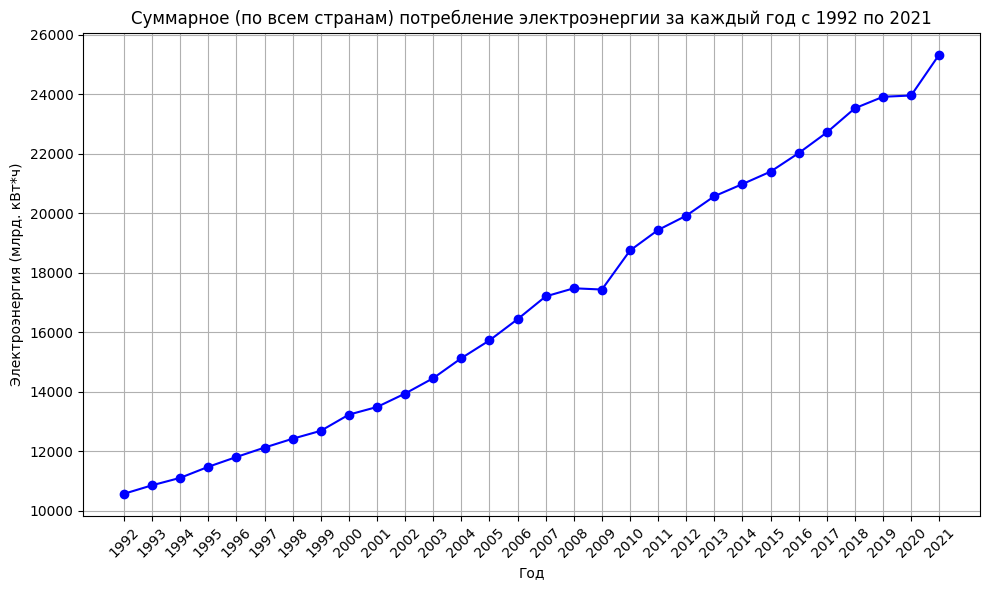

In [11]:
#3.1. Суммарное (по всем странам) потребление электроэнергии за каждый год.
total_consumption_per_year = np.nansum(consumption, axis=0) 
check_array_properties(total_consumption_per_year, "total_consumption_per_year")
print("Суммарное (по всем странам) потребление электроэнергии за каждый год:")
print("total_consumption_per_year:", total_consumption_per_year)
# Создаем массив годов
years = np.arange(1992, 2022)
# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(years, total_consumption_per_year, marker='o', linestyle='-', color='blue')
# Настройка графика
plt.title('Суммарное (по всем странам) потребление электроэнергии за каждый год с 1992 по 2021')
plt.xlabel('Год')
plt.ylabel('Электроэнергия (млрд. кВт*ч)')
plt.xticks(years, rotation=45)  # Угол поворота меток на оси X (года)
plt.grid()
plt.tight_layout()
plt.show()


In [12]:
#3.2. Максимальное количество электроэнергии, которое произвела одна страна за
# один год (указание: чтобы не учитывать отсутствующие и некорректные данные
# (nan) воспользуйтесь NaN-безопасной версией функции max, то есть nanmax).
max_generation = np.nanmax(generation)
# Находим координаты (индексы) максимального значения
max_index = np.argwhere(generation == max_generation)
print('Максимальное количество электроэнергии, которое произвела одна страна за один год с 1992 по 2021:')
print(f'В {years[max_index[0][1]]} году страна {countries[max_index[0][0]]} произвела максимальное количество электроэнергии за один год, равное {max_generation} млрд. кВт*ч')

Максимальное количество электроэнергии, которое произвела одна страна за один год с 1992 по 2021:
В 2021 году страна China произвела максимальное количество электроэнергии за один год, равное 8151.518231 млрд. кВт*ч


In [13]:
#3.3. Список стран, которые производят более 500 млрд. кВт*ч электроэнергии
# ежегодно в среднем за последние 5 лет (воспользуйтесь массивом, полученным на шаге 2).
countries_high_generation = countries[generation_last_5_years > 500]
values_high_generation = generation_last_5_years[generation_last_5_years > 500]
print('Cтраны, которые производят более 500 млрд. кВт*ч электроэнергии ежегодно в среднем за последние 5 лет:')
print(countries_high_generation)
print('Их значения соответственно:')
print(values_high_generation)

Cтраны, которые производят более 500 млрд. кВт*ч электроэнергии ежегодно в среднем за последние 5 лет:
['Russia' 'France' 'Germany' 'China' 'India' 'Japan' 'South Korea'
 'Canada' 'United States' 'Brazil']
Их значения соответственно:
[1059.9929956   533.2189509   581.55840426 7190.0225706  1595.2492692
  983.88014012  558.35508986  631.60639854 4130.2690856   614.18486198]


In [14]:
#3.4. 10% стран, которые потребляют больше всего электроэнергии ежегодно в
# среднем за последние 5 лет (указание: вначале определите соответствующую
# квантиль в массиве, построенном на шаге 2).
top_10_percent_consumption = np.nanquantile(consumption_last_5_years, 0.9)
countries_top_10_consumption = countries[consumption_last_5_years > top_10_percent_consumption]
values_top_10_consumption = consumption_last_5_years[consumption_last_5_years > top_10_percent_consumption]
print('10% стран, которые потребляют больше всего электроэнергии ежегодно в среднем за последние 5 лет:')
print(countries_top_10_consumption)
print('Их значения соответственно:')
print(values_top_10_consumption)

10% стран, которые потребляют больше всего электроэнергии ежегодно в среднем за последние 5 лет:
['South Africa' 'Russia' 'France' 'Germany' 'Italy' 'Spain' 'Turkiye'
 'United Kingdom' 'Australia' 'China' 'India' 'Indonesia' 'Japan'
 'South Korea' 'Taiwan' 'Vietnam' 'Iran' 'Saudi Arabia' 'Canada' 'Mexico'
 'United States' 'Brazil']
Их значения соответственно:
[ 200.64908812  946.67879564  445.22326374  520.23463954  296.44321744
  240.3715325   263.4906876   303.5439968   238.59747842 6846.2069926
 1330.9362418   256.32985952  940.32185964  539.51160504  265.07196974
  206.11583802  282.5080035   324.51712578  547.31965094  285.825534
 3957.497224    539.93348198]


In [15]:
#3.5. Список стран, которые увеличили производство электроэнергии в 2021 году по
# сравнению с 1992 годом более, чем в 10 раз.
increased_generation_countries = countries[generation[:, -1] > 10 * generation[:, 0]]
increased_generation_value = generation[generation[:, -1] > 10 * generation[:, 0]]
print('Список стран, которые увеличили производство электроэнергии в 2021 году по сравнению с 1992 годом более, чем в 10 раз:')
print(increased_generation_countries)
print('Их значения соответственно:')
print('Было в 1992:')
print(increased_generation_value[:, 0])
print('Стало в 2021:')
print(increased_generation_value[:, -1])


Список стран, которые увеличили производство электроэнергии в 2021 году по сравнению с 1992 годом более, чем в 10 раз:
['Angola' 'Benin' 'Equatorial Guinea' 'Ethiopia' 'Lesotho' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Sudan' 'Cambodia' 'China' 'Laos'
 'Maldives' 'Vietnam' 'Turks and Caicos Islands']
Их значения соответственно:
Было в 1992:
[  1.283   0.023   0.018   1.221   0.      0.271   0.139   0.408   0.
   1.59    0.166 716.04    0.898   0.028   9.43    0.026]
Стало в 2021:
[  16.429392      0.24109728    1.41812456   14.67815115    0.50122
    3.38822062    1.87585522   19.90774462    1.56716      16.59542448
    8.69423233 8151.518231     39.9708168     0.66198869  243.7683215
    0.27254   ]


In [16]:
#3.6. Список стран, которые в сумме за все годы потратили больше 100 млрд. кВт*ч
# электроэнергии и при этом произвели меньше, чем потратили.
countries_high_consumption_low_generation = countries[(np.nansum(consumption, axis=1) > 100) & (np.nansum(generation, axis=1) < np.nansum(consumption, axis=1))]
value_consumption_high_consumption_low_generation = np.nansum(consumption[(np.nansum(consumption, axis=1) > 100) & (np.nansum(generation, axis=1) < np.nansum(consumption, axis=1))], axis=1)
value_generation_high_consumption_low_generation = np.nansum(generation[(np.nansum(consumption, axis=1) > 100) & (np.nansum(generation, axis=1) < np.nansum(consumption, axis=1))], axis=1)
print('Список стран, которые в сумме за все годы потратили больше 100 млрд. кВт*ч электроэнергии и при этом произвели меньше, чем потратили:')
print(countries_high_consumption_low_generation)
print('Их значения соответственно:')
print('Потратели за все годы')
print(value_consumption_high_consumption_low_generation)
print('Произвели за все годы')
print(value_generation_high_consumption_low_generation)

Список стран, которые в сумме за все годы потратили больше 100 млрд. кВт*ч электроэнергии и при этом произвели меньше, чем потратили:
['Zimbabwe' 'Belarus' 'Moldova' 'Belgium' 'Croatia' 'Finland' 'Hungary'
 'Italy' 'Latvia' 'Luxembourg' 'Netherlands' 'North Macedonia' 'Hong Kong']
Их значения соответственно:
Потратели за все годы
[ 260.62253578  922.32622734  202.82303    2395.9070157   418.56521666
 2356.6366107  1066.9596235  8576.5745452   179.2878714   177.5383606
 3106.4053147   186.88380578 1152.85186444]
Произвели за все годы
[ 238.1844426   895.45714389  180.22303    2342.3579569   342.3915751
 2069.4248848   981.6842182  7879.0303155   146.6568336    38.265581
 2896.5128274   177.7604534   998.42300134]


In [17]:
#3.7. Какая страна потратила наибольшее количество электроэнергии в 2020 году?
max_consumption_country_2020 = countries[np.nanargmax(consumption[:, -2])]
# Находим координату (индекс) страны
index = np.argwhere(countries == max_consumption_country_2020)
print('Страна, потратившая наибольшее количество электроэнергии в 2020 году:')
print(f'В 2020 году страна {max_consumption_country_2020} потратила наибольшее количество электроэнергии в 2020 году, равное {consumption[index[0][0], -2]} млрд. кВт*ч')

Страна, потратившая наибольшее количество электроэнергии в 2020 году:
В 2020 году страна China потратила наибольшее количество электроэнергии в 2020 году, равное 7115.077185 млрд. кВт*ч
